In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = data.drop(['Outcome'],axis=1)
Y = data['Outcome']

In [10]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
logistique = LogisticRegression()

In [12]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [15]:
def evaluation(model):
    model.fit(x_train, y_train)
    #ypred=model.predict(x_test)
    N, train_score, val_score = learning_curve(model,x_train,y_train, cv=4, scoring='f1')
    ypred=model.predict(x_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='val score')
    plt.legend()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[[48  3]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



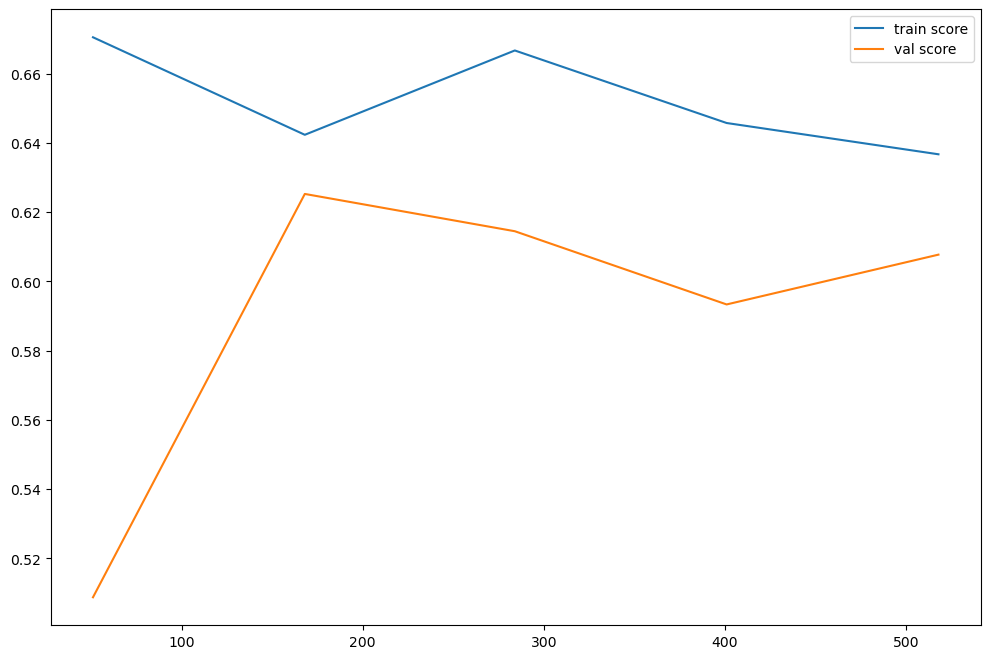

In [17]:
evaluation(logistique)

In [18]:
from sklearn.model_selection import GridSearchCV

In [32]:
hyper_param_ = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'penalty':['l2'],
                'C':[100, 500, 1.0, 0.1, 0.01]}

In [30]:
def best_hyper(model,hyper_p):
    grid = GridSearchCV(model,hyper_p,cv=5,scoring='recall')
    grid.fit(x_train,y_train)
    print(grid.best_params_)
    y_pred = grid.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return grid

In [33]:
best_hyper(logistique, hyper_param_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
[[48  3]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 500, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='recall')